In [41]:
%matplotlib notebook

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sb

from sklearn.datasets import load_iris

In [66]:
seed = 54

In [42]:
data = load_iris()

In [43]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [44]:
feature_names = data.feature_names
short_feature_names = [f.replace(" (cm)", "").replace(" ", "_") for f in feature_names]

In [45]:
df = pd.DataFrame(data.data, columns=short_feature_names)

In [46]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [47]:
labels = pd.DataFrame(data.target)

In [48]:
df.loc[:,'class'] = pd.Series(data.target, index=df.index)

<IPython.core.display.Javascript object>


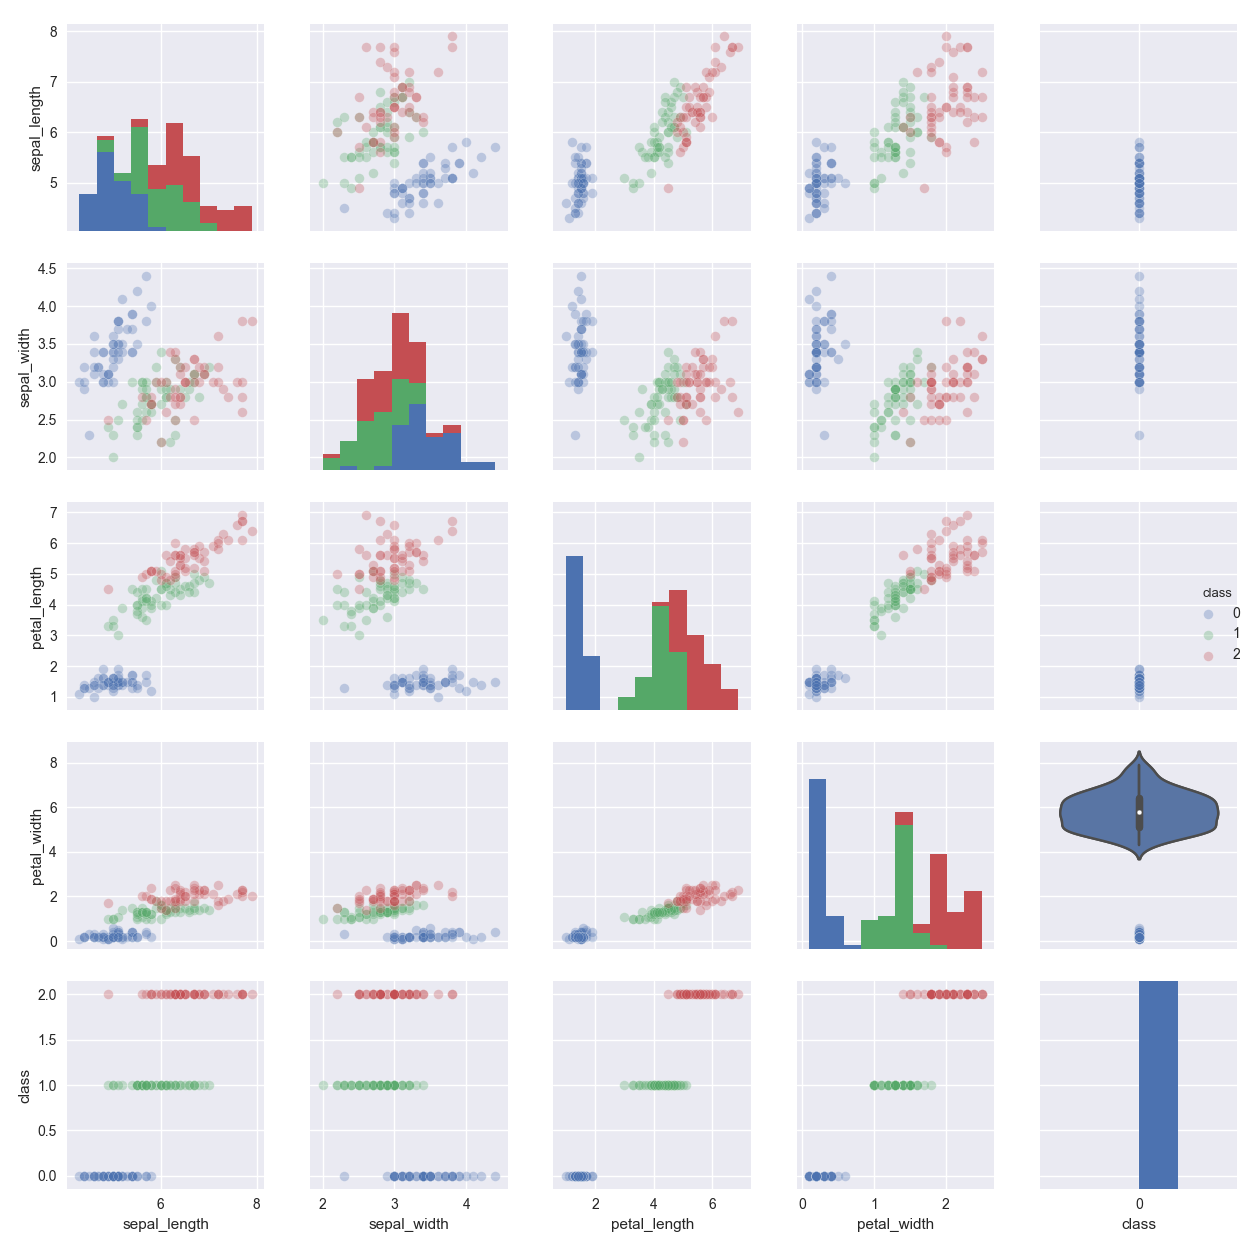

In [49]:
sb.pairplot(df, hue='class', plot_kws={'alpha': 0.3})

<IPython.core.display.Javascript object>


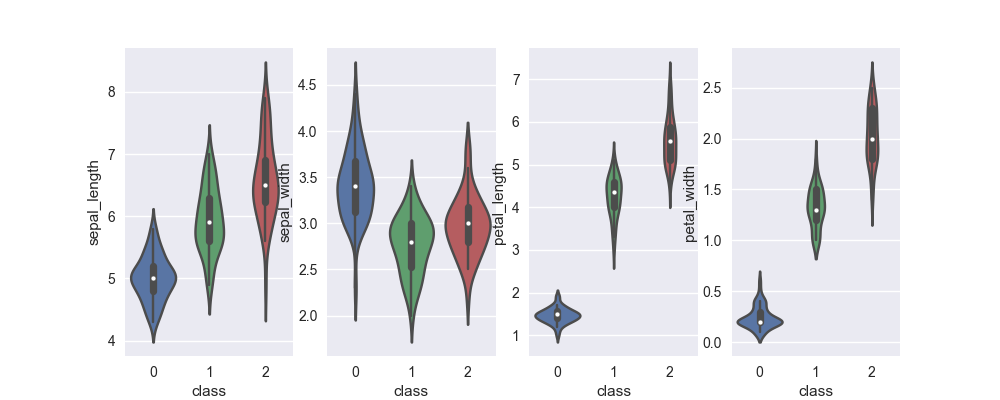

In [63]:
selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(10, 4))

for column_index, column in enumerate(selected_columns):
    plt.subplot(1, 4, column_index + 1)
    sb.violinplot(x="class", y=column, data=df)

In [64]:
features = selected_columns

X = df[features]
y = df["class"]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)

In [68]:
# Step 1: Import the model
from sklearn.tree import DecisionTreeClassifier

# Step 2: Instantiate the model
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

# Step 3: Fit the model on data (i.e. train the model)
decision_tree_classifier.fit(X_train, y_train)

# Step 4: Generate predictions / scores
decision_tree_classifier.score(X_test, y_test)

0.93333333333333335

<IPython.core.display.Javascript object>


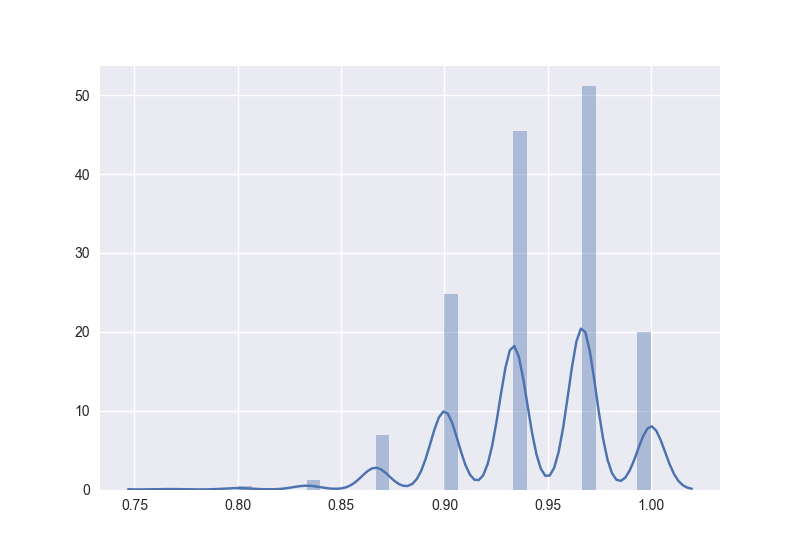

In [69]:
# model_accuracies = []

# # Split the dataset differently and fit a model on this split, 1,000 times
# for i in range(1000):
#     X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.8, random_state=i)
    
#     decision_tree_classifier = DecisionTreeClassifier(random_state=seed)
#     decision_tree_classifier.fit(X2_train, y2_train)
#     classifier_accuracy = decision_tree_classifier.score(X2_test, y2_test)
#     model_accuracies.append(classifier_accuracy)

# sb.distplot(model_accuracies)

In [72]:
# Step 1: Import the model
from sklearn.svm import SVC

# Step 2: Instantiate the model
svclassifier =SVC(random_state=seed)

# Step 3: Fit the model on data (i.e. train the model)
svclassifier.fit(X_train, y_train)

# Step 4: Generate predictions / scores
svclassifier.score(X_test, y_test)

1.0

<IPython.core.display.Javascript object>


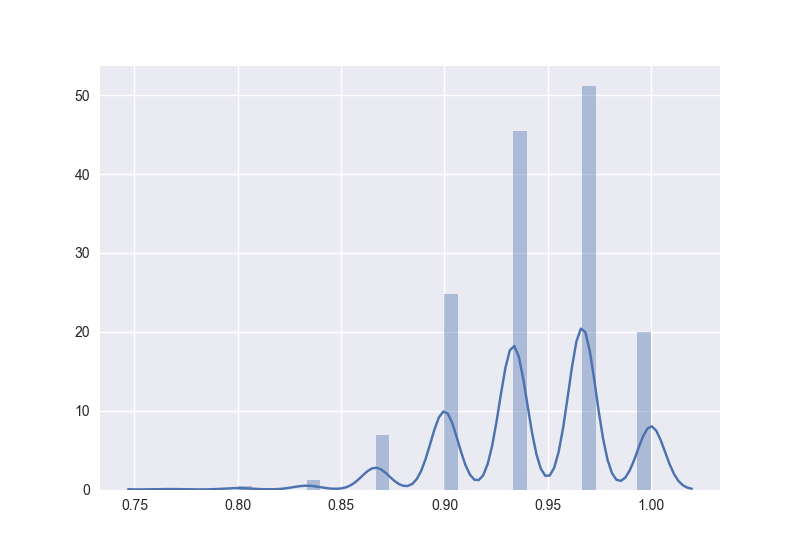

In [73]:
model_accuracies = []

# Split the dataset differently and fit a model on this split, 1,000 times
for i in range(1000):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.8, random_state=i)
    
    decision_tree_classifier = DecisionTreeClassifier(random_state=seed)
    decision_tree_classifier.fit(X2_train, y2_train)
    classifier_accuracy = decision_tree_classifier.score(X2_test, y2_test)
    model_accuracies.append(classifier_accuracy)

sb.distplot(model_accuracies)

In [74]:
classifier_accuracy = decision_tree_classifier.score(X, y)

In [75]:
classifier_accuracy

0.98666666666666669